# Comparing samples from normal distributions
authors: Maja H Kirkeby, Bernardo Santos, and João P. Fernandes

In this notebook we aim to show 
- whether or not there is a significant difference between two or more samples using the ANOVA individual test, and 
- in case there is a significant difference, we want to show whether the difference is positive or negative and whether it is considered large or not using Cohen's D and Hedge's G tests. 

*This requires (1) removing outliers, and (2) testing all the assumptions of the ANOVA tests.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [2]:
# import your file into a Pandas dataframe 
file_name = 'Python_mini.csv'
df = pd.read_csv(file_name, header = 0, delimiter=";", decimal=".", names=['test','PKG','CPU','nn','nn2','time'])
df = df[['test', 'PKG', 'CPU', 'time']]

In [3]:
df

,test,PKG,CPU,time
0,logistic_model,6.407593,5.497314,908.249
1,logistic_model,6.505371,5.585876,919.677
2,logistic_model,6.434570,5.519470,908.406
3,logistic_model,6.440552,5.538452,893.739
4,logistic_model,6.440552,5.538452,893.739
...,...,...,...,...
795,svm_model,142.368896,126.283203,17332.900
796,svm_model,141.753052,125.737122,17253.700
797,svm_model,143.169434,127.151367,17257.200
798,svm_model,143.359497,127.288757,17273.700


<Axes: xlabel='CPU', ylabel='time'>

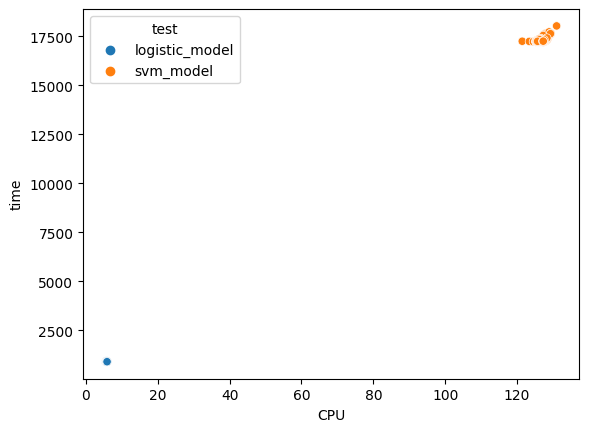

In [4]:
sns.scatterplot(data=df,hue='test',x='CPU', y='time')

<Axes: xlabel='CPU', ylabel='Count'>

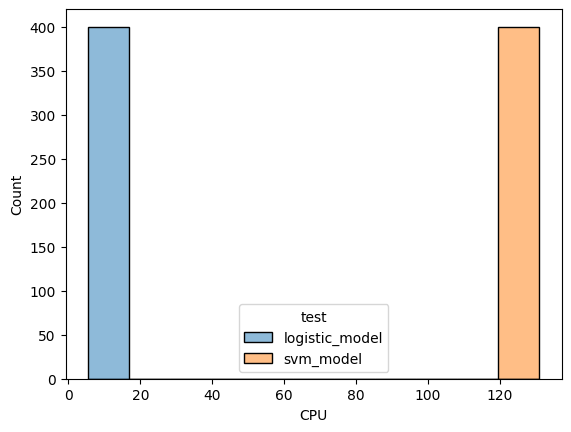

In [5]:
sns.histplot(data=df,hue='test',x='CPU')


<Axes: xlabel='CPU', ylabel='Density'>

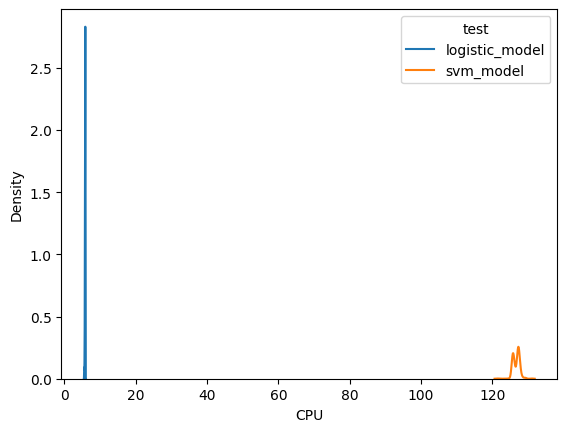

In [6]:
sns.kdeplot(data=df,hue='test',x='CPU')

# Normal distribution test
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [7]:
# create a subset of your data
# define the data source and how to separate the data
data = df
data_column = 'CPU'         # The column name with the data that we want to compare
types_column_name = 'test'  # The column name with the data in it
typeA = 'svm_model'  # The category of data A
typeB = 'logistic_model'       # The category of data B

#repetitions_of_random_sampling = 10000

# create a new dataframe with the interesting subset 
df_SVM_model = data[(data[types_column_name]==typeA)][data_column]
df_Logistic_model = data[(data[types_column_name]==typeB)][data_column]

# create a new dataframe with the interesting subset 
SVM_model = list(df_SVM_model)
Logistic_model = list(df_Logistic_model)


# Removing outliers

In [8]:
# Remove outliers from the initial data (per sample) 
# use quantile outliers when we do not have normal distributed data
def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data

df_SVM_model = remove_outliers_quantile(df_SVM_model)
df_Logistic_model = remove_outliers_quantile(df_Logistic_model)

number of outliers: 3 of 400 observations.
number of outliers: 10 of 400 observations.


In [9]:
# plot 
df['CPU'] = pd.to_numeric(df['CPU'], errors='coerce')

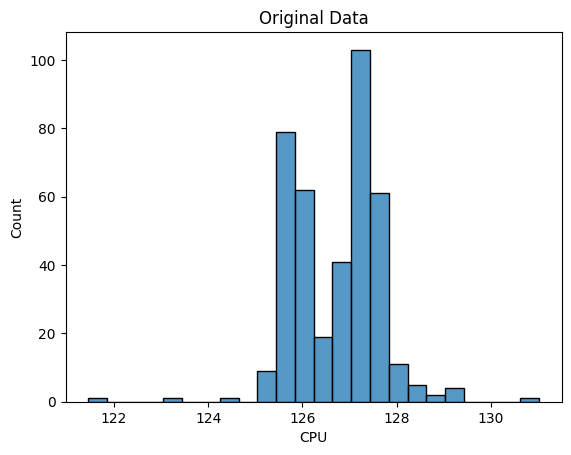

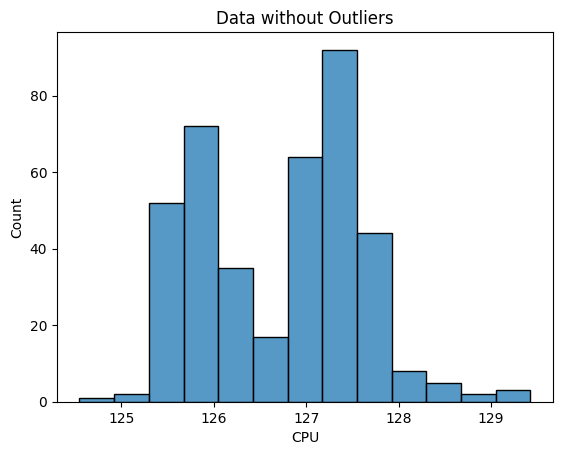

In [10]:
# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data')
plt.show()
sns.histplot(data=df_SVM_model).set(title='Data without Outliers')
plt.show()

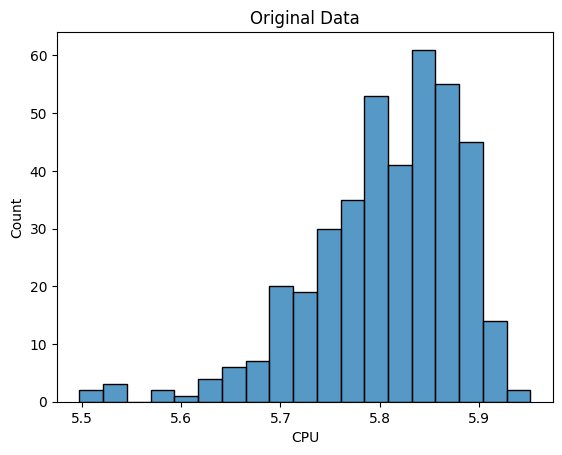

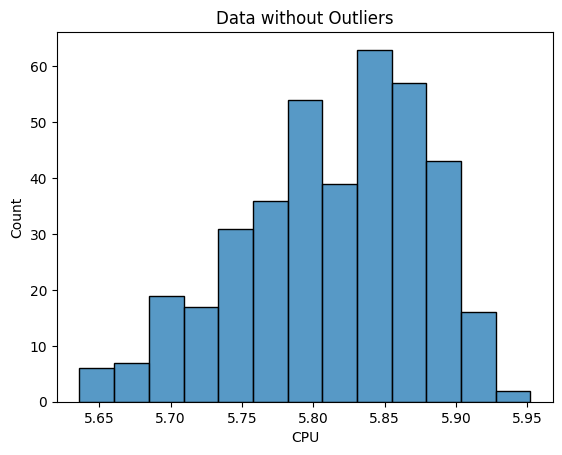

In [11]:
# plot 
sns.histplot(data=data[(data[types_column_name]==typeB)][data_column]).set(title='Original Data')
plt.show()
sns.histplot(data=df_Logistic_model).set(title='Data without Outliers')
plt.show()

## Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [12]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = SVM_model
#data = Logistic_model
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.928, p=0.000
Probably not Gaussian


In [13]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
#data = SVM_model
data = Logistic_model
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.940, p=0.000
Probably not Gaussian


## D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions**:
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution

In [14]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = SVM_model
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=32.062, p=0.000
Probably not Gaussian


In [15]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = Logistic_model
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=69.071, p=0.000
Probably not Gaussian


## Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.


In [16]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = Logistic_model
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4.800
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)


In [17]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = SVM_model
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 8.365
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)


## Sample size determination - Cochranes formula:

### z-score:
assumes normal distribution of data

| Confidence level | z-score | 
| --- | --- |
| 80% | 1.282 |
| 90% | 1.645 |
| 95% | 1.960 |
| 98% | 2.326 |
| 99% | 2.576 |


In [18]:
z_score = {80:1.282, 90:1.645, 95:1.960, 98:2.326, 99:2.576}

confidence_level = 95

z = z_score[confidence_level]  # z-score
p = 0.5 # maximum variability
q = 1-p
e = (100-confidence_level)/100

n0 = (z**2 * p * q)/e**2
print(f"number of samples when we do not have any knowledge: {n0}")


number of samples when we do not have any knowledge: 384.1599999999999


In [19]:
# when the standard deviation is known
sigma = df_SVM_model.std()

n0 = z**2 * sigma * (1-sigma) /  e**2
print(f"number of samples when the std deviation is {sigma}: {n0}")

number of samples when the std deviation is 0.8608400632840962: 184.08094169512938


In [20]:
# when the standard deviation is known
sigma = df_Logistic_model.std()

n0 = z**2 * sigma * (1-sigma) /  e**2
print(f"number of samples when the std deviation is {sigma}: {n0}")

number of samples when the std deviation is 0.06446271963305021: 92.6705747601644


## Lavene's test
https://pyshark.com/levenes-test-for-equality-of-variances-explained-with-python-examples/

Tests whether the observations in each sample have the same variance.

**Interpretation**
- H0: The null hypothesis of Levene’s test is that all groups have equal variances.
- H1: The alternative hypothesis of Levene’s test is that at least one pair of groups has unequal variances.


In [21]:
from scipy.stats import levene
stat, p_value = levene(SVM_model, Logistic_model)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

if  p_value > 0.05:
	print('Cannot reject the null hypothesis: all groups probably have equal variances')
else:
	print('Reject the null hypothesis: at least one pair of groups has unequal variances')


Lavene's test statistic: 571.7113095915888
P-value: 1.0566720545044334e-95
Reject the null hypothesis: at least one pair of groups has unequal variances


# Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

**Assumptions:**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

**Interpretation**
- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

In [22]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = SVM_model
data2 = Logistic_model
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=6615095.135, p=0.000
Probably different distributions
